In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
warnings.filterwarnings('ignore')
from collections import Counter # To do counter of some features

In [2]:
df=pd.read_csv("german_credit_data.csv", index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [5]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [6]:
cols=df.columns

In [7]:
for a in cols:
    if a not in ('Credit amount','Age','Duration'):
        print(a,':: ',df[a].unique())

Sex ::  ['male' 'female']
Job ::  [2 1 3 0]
Housing ::  ['own' 'free' 'rent']
Saving accounts ::  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account ::  ['little' 'moderate' nan 'rich']
Purpose ::  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk ::  ['good' 'bad']


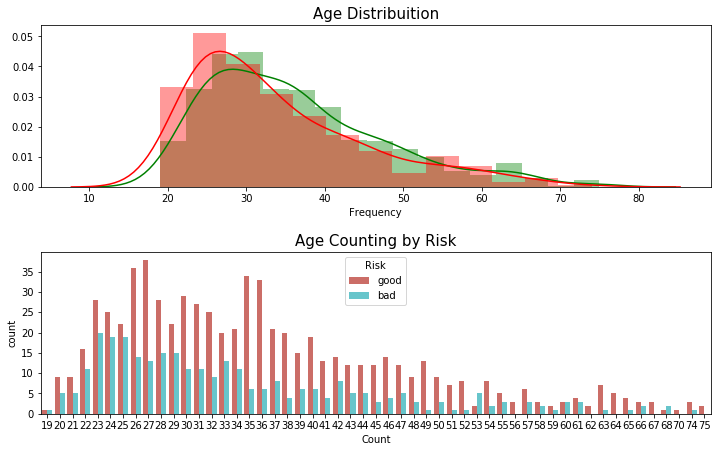

In [8]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [9]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [10]:
Interval=(18,25,33,42,76)
catg=['Student', 'Young','Middleage','Senior']
df['Age_cat']= pd.cut(df.Age,Interval,labels=catg)
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

In [11]:
trace0= go.Box(
y=df_good['Credit amount'],
x=df_good['Age_cat'], name='Good Credit', marker=dict(color='#3D9970'))

trace1= go.Box(
y=df_bad['Credit amount'],
x=df_bad['Age_cat'], name='bad Credit', marker=dict(color='#FF9970'))

In [12]:
data=[trace0,trace1]
layout= go.Layout(yaxis= dict(title='Credit Amount in $', zeroline=False),
                 xaxis= dict(title='Age category', zeroline=False),
                  boxmode='group')
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Age vs Credit Amount")

In [13]:
trace0= go.Bar(
x=df[df['Risk']=='good']['Housing'].value_counts().index.values,
y=df[df['Risk']=='good']['Housing'].value_counts().values, 
    name='Good Credit')

trace1= go.Bar(
x=df[df['Risk']=='bad']['Housing'].value_counts().index.values,
y=df[df['Risk']=='bad']['Housing'].value_counts().values, name='bad Credit')

data=[trace0,trace1]
layout= go.Layout(xaxis= dict(title='Housing Type', zeroline=False),
                  boxmode='group')
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Housing vs Credit Risk")

In [14]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [15]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

In [16]:
trace0= go.Bar(
x=df[df['Risk']=='good']['Job'].value_counts().index.values,
y=df[df['Risk']=='good']['Job'].value_counts().values, 
    name='Good Credit')

trace1= go.Bar(
x=df[df['Risk']=='bad']['Job'].value_counts().index.values,
y=df[df['Risk']=='bad']['Job'].value_counts().values, name='bad Credit')

data=[trace0,trace1]
layout= go.Layout(xaxis= dict(title='Job Type', zeroline=False),
                  boxmode='group')
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Job vs Credit Risk")

In [17]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Age_cat               0
dtype: int64

In [18]:
df['Saving accounts']=df['Saving accounts'].fillna('No_Info')
df['Checking account']=df['Checking account'].fillna('No_Info')
df[df['Saving accounts'].isnull()==True]
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Age_cat             0
dtype: int64

In [19]:
df.dtypes

Age                    int64
Sex                   object
Job                    int64
Housing               object
Saving accounts       object
Checking account      object
Credit amount          int64
Duration               int64
Purpose               object
Risk                  object
Age_cat             category
dtype: object

In [20]:
#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [21]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_little,Check_moderate,Check_rich,Age_cat_Young,Age_cat_Middleage,Age_cat_Senior
0,67,male,2,own,No_Info,little,1169,6,radio/TV,good,...,0,0,0,1,1,0,0,0,0,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0,0,1,0,0,1,0,0,0,0
2,49,male,1,own,little,No_Info,2096,12,education,good,...,0,0,0,1,0,0,0,0,0,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0,0,0,1,1,0,0,0,0,1
4,53,male,2,free,little,little,4870,24,car,bad,...,0,0,1,0,1,0,0,0,0,1


In [22]:
col=df.columns
col

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_cat',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_little', 'Savings_moderate', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Risk_good', 'Check_little',
       'Check_moderate', 'Check_rich', 'Age_cat_Young', 'Age_cat_Middleage',
       'Age_cat_Senior'],
      dtype='object')

In [23]:
df=df.drop(columns=[ 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk','Risk_good','Age_cat'])
df.dtypes

Age                            int64
Job                            int64
Credit amount                  int64
Duration                       int64
Purpose_car                    uint8
Purpose_domestic appliances    uint8
Purpose_education              uint8
Purpose_furniture/equipment    uint8
Purpose_radio/TV               uint8
Purpose_repairs                uint8
Purpose_vacation/others        uint8
Sex_male                       uint8
Housing_own                    uint8
Housing_rent                   uint8
Savings_little                 uint8
Savings_moderate               uint8
Savings_quite rich             uint8
Savings_rich                   uint8
Risk_bad                       uint8
Check_little                   uint8
Check_moderate                 uint8
Check_rich                     uint8
Age_cat_Young                  uint8
Age_cat_Middleage              uint8
Age_cat_Senior                 uint8
dtype: object

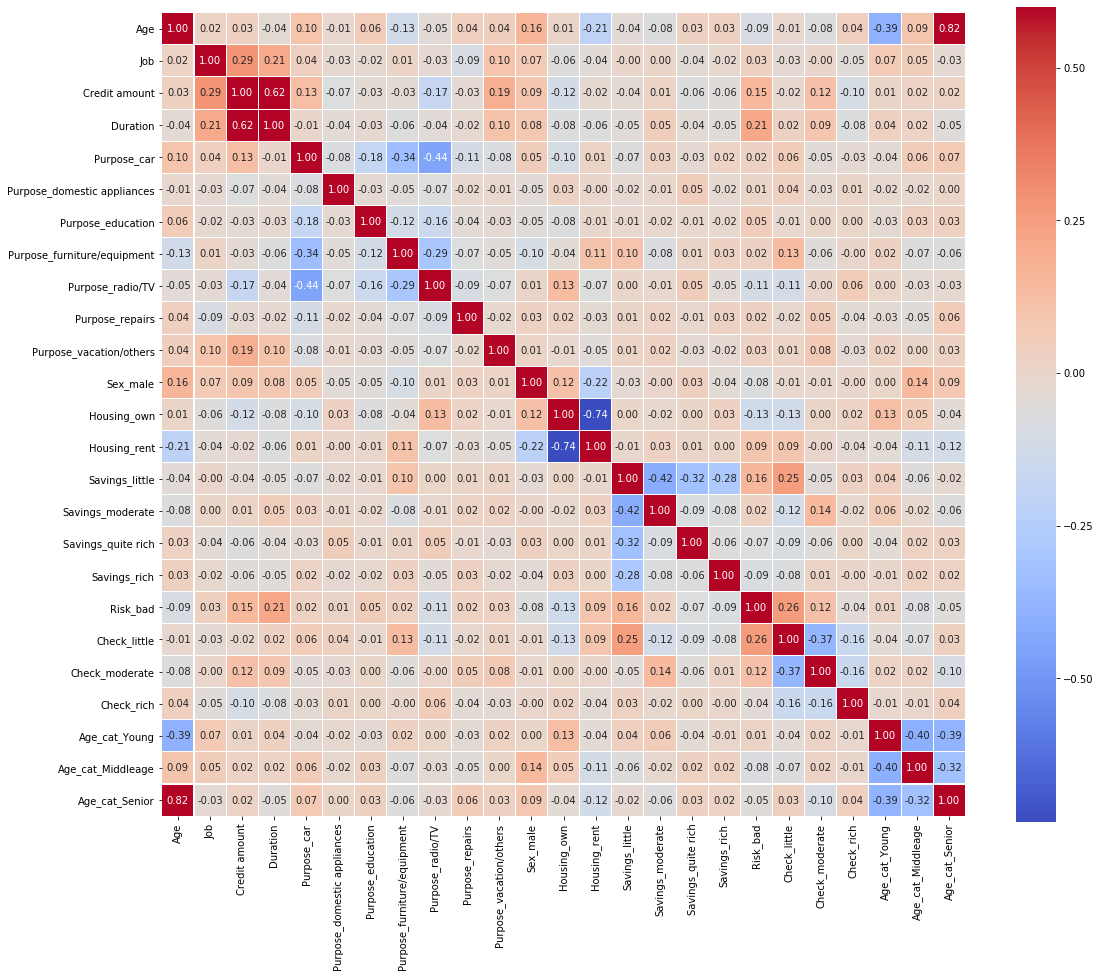

In [24]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),linewidths=.1, vmax=0.6, square=True, linecolor='white',annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

## Import Libraries for machine learning

In [25]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [26]:
X=df.drop('Risk_bad',1).values
y=df['Risk_bad'].values

In [27]:
normalized_X = preprocessing.normalize(X)

In [28]:
normalized_X

array([[5.72191009e-02, 1.70803286e-03, 9.98345208e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.54016431e-04],
       [3.69671174e-03, 3.36064704e-04, 9.99960527e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33710782e-02, 4.76960779e-04, 9.99709792e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.76960779e-04],
       ...,
       [4.72054060e-02, 2.48449505e-03, 9.98767012e-01, ...,
        0.00000000e+00, 1.24224753e-03, 0.00000000e+00],
       [1.24614361e-02, 1.08360314e-03, 9.99623893e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.89996027e-03, 4.37034094e-04, 9.99934008e-01, ...,
        2.18517047e-04, 0.00000000e+00, 0.00000000e+00]])

In [29]:
X_train,X_test, y_train, y_test= train_test_split(normalized_X,y, test_size=0.2, random_state=27)

In [30]:
seed=7

In [31]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SCM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

LR : 0.000000 (0.000000)
LDA : 0.272041 (0.083185)
KNN : 0.281774 (0.067398)
CART : 0.433499 (0.120521)
NB : 0.812936 (0.077787)
RF : 0.336895 (0.096737)
SCM : 0.000000 (0.000000)
XGB : 0.437187 (0.112449)


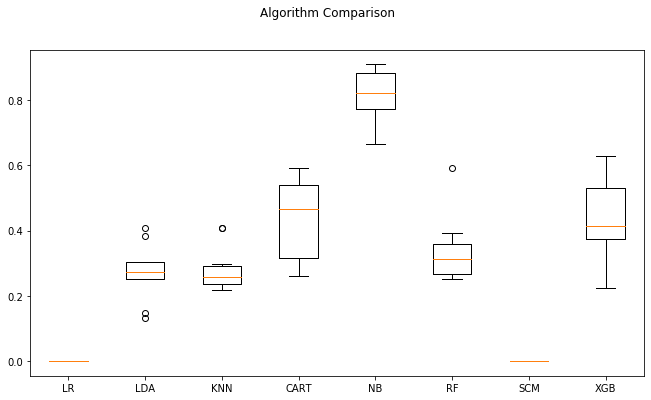

In [32]:
results=[]
names=[]
scoring='recall'
for name, model in models:
    kfold=KFold(n_splits=10,random_state=seed)
    cv_results= cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" %(name, cv_results.mean(),cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR : 0.430391 (0.062764)
LDA : 0.471569 (0.081252)
KNN : 0.285648 (0.083562)
CART : 0.537391 (0.120841)
NB : 0.531161 (0.092660)
RF : 0.324963 (0.071941)
SCM : 0.004545 (0.013636)
XGB : 0.434106 (0.110837)


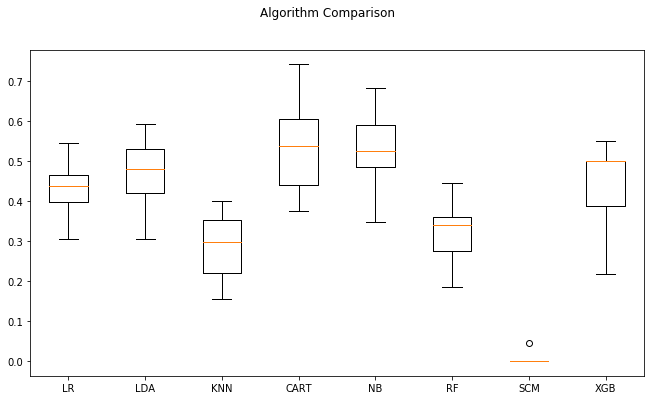

In [33]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=27)
seed=7
results=[]
names=[]
scoring='recall'
for name, model in models:
    kfold=KFold(n_splits=10,random_state=seed)
    cv_results= cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" %(name, cv_results.mean(),cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [40]:
X_train1,X_test1, y_train1, y_test1= train_test_split(X, y, test_size=0.2, random_state=27)
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train1, y_train1)
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train1, y_train1))

y_pred = model.predict(X_test1)

print('Accuracy score: ', accuracy_score(y_test1,y_pred))
print("\n")
print(confusion_matrix(y_test1, y_pred))
print("\n")
print(classification_report(y_test1, y_pred))

Training score data: 
0.7
Accuracy score:  0.64


[[93 51]
 [21 35]]


              precision    recall  f1-score   support

           0       0.82      0.65      0.72       144
           1       0.41      0.62      0.49        56

    accuracy                           0.64       200
   macro avg       0.61      0.64      0.61       200
weighted avg       0.70      0.64      0.66       200



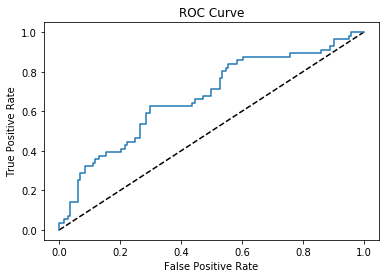

In [39]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test1)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
x=[1,2,3,4]
y=pd.to_numeric(x)
y

array([1, 2, 3, 4], dtype=int64)